# MAG中收录的期刊的基本特征

In [1]:
import pickle as pk
from collections import Counter
import numpy as np
# plot 同时中英混排
import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.style.use('seaborn')
plt.figure(figsize=(4,3), dpi=300)
# 字体加载
font_path = "../font/tnw+simsun.ttf"
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
# 字体设置
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()  # 根据名称设置字体
plt.rcParams['font.size'] = 14 # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False # 使坐标轴刻度标签正常显示正负号

<Figure size 1200x900 with 0 Axes>

In [2]:
# # journal_cate key: mag journal id. values: a dictionary containing the metadata of the journals. e.g. jcrCate, jcrName, JCI, JIF
journal_cate = pk.load(open('../DataCrossBoundaryPerspective_InterdisciplinaryResearch/journal_cate.pkl','rb'))

In [3]:
count = 10
for k,v in journal_cate.items():
    # print(v['jcrCate'].split('$'))
    print(v)
    count -= 1
    if count == 0:
        break

{'jcrCate': 'MATHEMATICS, INTERDISCIPLINARY APPLICATIONS - SCIE$STATISTICS & PROBABILITY - SCIE$DEMOGRAPHY - SSCI$SOCIAL SCIENCES, MATHEMATICAL METHODS - SSCI', 'jcrName': 'Mathematical Population Studies', 'magName': 'mathematical population studies', 'magIssn': ['0889-8480', '0889-8480', '1547-724X'], 'jcrIssn': '0889-8480', 'jcrEIssn': '1547-724X', '2021-JIF': '1.355', '2021-Qscie': 'Q3', '2021-Qssci': 'Q4', '2021-Qahci': 'N/A', '2021-JCI': '0.38'}
{'jcrCate': 'MINERALOGY - SCIE', 'jcrName': 'Journal of Mineralogical and Petrological Sciences', 'magName': 'journal of mineralogical and petrological sciences', 'magIssn': ['1345-6296', '1349-3825', '1345-6296'], 'jcrIssn': '1345-6296', 'jcrEIssn': '1349-3825', '2021-JIF': '1.041', '2021-Qscie': 'Q4', '2021-Qssci': 'N/A', '2021-Qahci': 'N/A', '2021-JCI': '0.30'}
{'jcrCate': 'ONCOLOGY - SCIE$RADIOLOGY, NUCLEAR MEDICINE & MEDICAL IMAGING - SCIE', 'jcrName': 'STRAHLENTHERAPIE UND ONKOLOGIE', 'magName': 'strahlentherapie und onkologie', 'ma

In [4]:
# 检查基本数据,命名很规范
for k,v in journal_cate.items():
    for field in v['jcrCate'].split('$'):
        if field[-4:] not in ['SCIE','SSCI','AHCI']:
            print(field[-4:])

共有1万3千本期刊, 数量上看单学科期刊有多少本.多学科期刊有多少本

还需要看期刊分类粒度.

In [5]:
# 期刊数量分布
numJournalCateCounter = Counter()
for k,v in journal_cate.items():
    numJournalCateCounter[len(v['jcrCate'].split('$'))] += 1
print(numJournalCateCounter)
numFields , frequency = zip(*numJournalCateCounter.items())
print(numFields, frequency)

Counter({1: 7618, 2: 4339, 3: 1343, 4: 392, 5: 56, 6: 13, 8: 1})
(4, 1, 2, 3, 5, 6, 8) (392, 7618, 4339, 1343, 56, 13, 1)


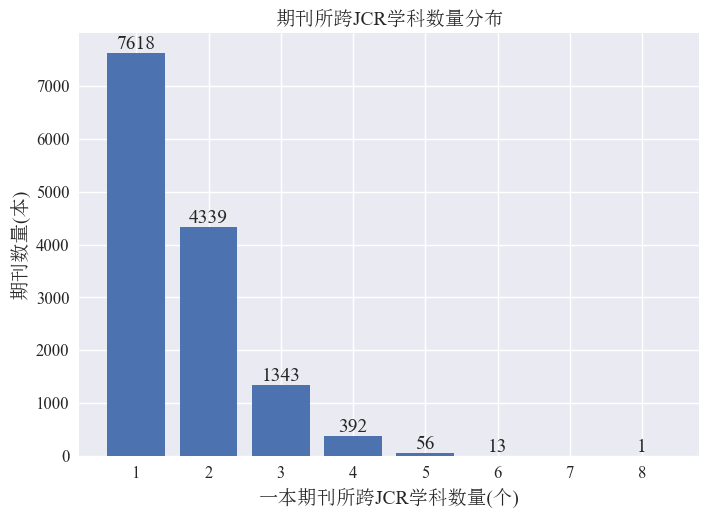

In [6]:
fig, ax = plt.subplots()
bars = ax.bar(numFields, frequency)
ax.bar_label(bars)
ax.set_ylabel('期刊数量(本)', font=prop.get_name())
ax.set_xlabel('一本期刊所跨JCR学科数量(个)', font=prop.get_name())
ax.set_title('期刊所跨JCR学科数量分布', font=prop.get_name())
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()
fig.savefig("期刊所跨JCR学科数量分布.png",dpi=300)

注意，这里的JCR学科数量带索引后缀，例如'mathematics-scie'. 后面去掉了后缀。

跨不同学科的情况,下面看跨不同检索大类的情况.

In [7]:
# 输出这个跨了几个Index,1-3皆有可能.
def index_count(FieldList):
    index_set = set()
    for field in FieldList:
        index_set.add(field[-4:])
    return len(index_set)

In [8]:
# 从SSCI, SCIE, AHCI期刊数量分布
numJournalIndexCounter = Counter()
for k,v in journal_cate.items():
    numJournalIndexCounter[index_count(v['jcrCate'].split('$'))] += 1
    if index_count(v['jcrCate'].split('$')) == 3:
        print(v['2021-JIF'], v['jcrName'] ,'=============================',v['jcrCate'], )
print(numJournalIndexCounter)
numIndex , frequency = zip(*sorted(numJournalIndexCounter.items()))
numIndex = list(map(str,numIndex))
print(numIndex, frequency)

0.964 Studies in History and Philosophy of Science Part C-Studies in History and Philosophy of Biological and Biomedical Sciences ============================= HISTORY & PHILOSOPHY OF SCIENCE - SCIE$HISTORY & PHILOSOPHY OF SCIENCE - AHCI$HISTORY & PHILOSOPHY OF SCIENCE - SSCI
3.282 BRITISH JOURNAL FOR THE PHILOSOPHY OF SCIENCE ============================= HISTORY & PHILOSOPHY OF SCIENCE - SCIE$HISTORY & PHILOSOPHY OF SCIENCE - AHCI$HISTORY & PHILOSOPHY OF SCIENCE - SSCI
2.213 Archaeological and Anthropological Sciences ============================= GEOSCIENCES, MULTIDISCIPLINARY - SCIE$ARCHAEOLOGY - AHCI$ANTHROPOLOGY - SSCI
0.415 SCIENCE IN CONTEXT ============================= HISTORY & PHILOSOPHY OF SCIENCE - SCIE$HISTORY & PHILOSOPHY OF SCIENCE - AHCI$HISTORY & PHILOSOPHY OF SCIENCE - SSCI
1.841 Natural Language Engineering ============================= COMPUTER SCIENCE, ARTIFICIAL INTELLIGENCE - SCIE$LANGUAGE & LINGUISTICS - AHCI$LINGUISTICS - SSCI
0.306 HISTORIA MATHEMATICA =====

还是有1000多本期刊是双期刊收录的,3本是3期刊收录的, 看上去基本是研究某个领域的历史. 或者哲学什么的. 技术哲学, 还有自然语言处理， 设计学，考古学等。

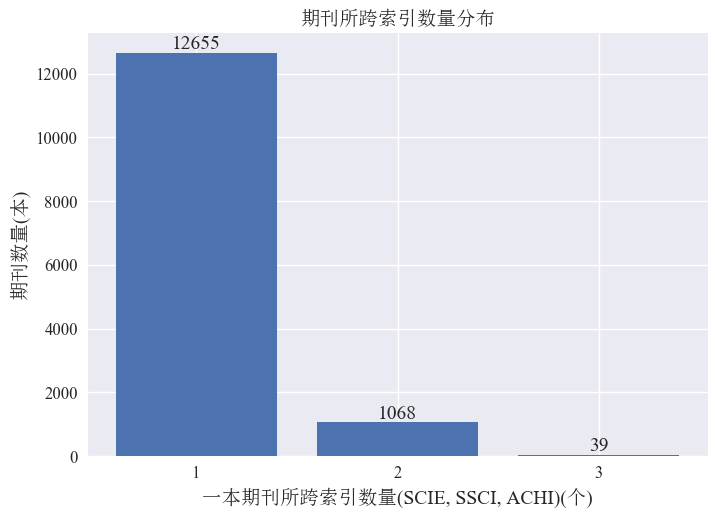

In [9]:
fig, ax = plt.subplots()
bars = ax.bar(numIndex, frequency)
ax.bar_label(bars)
ax.set_ylabel('期刊数量(本)', font=prop.get_name())
ax.set_xlabel('一本期刊所跨索引数量(SCIE, SSCI, ACHI)(个)', font=prop.get_name())
ax.set_title('期刊所跨索引数量分布', font=prop.get_name())
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()
fig.savefig("期刊所跨索引数量分布.png",dpi=300)

下面看SCIE, SSCI, AHCI三类. 具体的分类情况

In [10]:
#全部期刊的情况
numCateCounter = Counter()
for k,v in journal_cate.items():
    for field in v['jcrCate'].split('$'):
        numCateCounter[field[:-7]] += 1
print(numCateCounter)
numIndex , frequency = zip(*sorted(numCateCounter.items()))
print(numIndex, frequency)
print(len(numIndex))

Counter({'PUBLIC, ENVIRONMENTAL & OCCUPATIONAL HEALTH': 392, 'HISTORY': 387, 'ECONOMICS': 382, 'MATERIALS SCIENCE, MULTIDISCIPLINARY': 346, 'MATHEMATICS': 332, 'PSYCHIATRY': 299, 'BIOCHEMISTRY & MOLECULAR BIOLOGY': 296, 'ENVIRONMENTAL SCIENCES': 278, 'PHARMACOLOGY & PHARMACY': 278, 'ENGINEERING, ELECTRICAL & ELECTRONIC': 278, 'NEUROSCIENCES': 272, 'EDUCATION & EDUCATIONAL RESEARCH': 270, 'MATHEMATICS, APPLIED': 267, 'NURSING': 248, 'ONCOLOGY': 245, 'PLANT SCIENCES': 237, 'MANAGEMENT': 228, 'SURGERY': 214, 'CLINICAL NEUROLOGY': 212, 'GEOSCIENCES, MULTIDISCIPLINARY': 202, 'LANGUAGE & LINGUISTICS': 202, 'CELL BIOLOGY': 194, 'LINGUISTICS': 194, 'POLITICAL SCIENCE': 188, 'PHILOSOPHY': 187, 'CHEMISTRY, MULTIDISCIPLINARY': 179, 'GENETICS & HEREDITY': 177, 'ZOOLOGY': 175, 'ECOLOGY': 174, 'HISTORY & PHILOSOPHY OF SCIENCE': 174, 'MEDICINE, GENERAL & INTERNAL': 172, 'CHEMISTRY, PHYSICAL': 165, 'COMPUTER SCIENCE, INFORMATION SYSTEMS': 164, 'IMMUNOLOGY': 163, 'PHYSICS, APPLIED': 161, 'BIOTECHNOLOGY

In [11]:
#SCIE
all_intersection = set()
for index in ['SSCI','SCIE', 'AHCI']:
    numCateCounter = Counter()
    for k,v in journal_cate.items():
        for field in v['jcrCate'].split('$'):
            # if field[:-7] == 'HISTORY & PHILOSOPHY OF SCIENCE':
            #     print(v)
            if field[-4:] == index:
                numCateCounter[field[:-7]] += 1
    temp = set(numCateCounter.keys())
    if len(all_intersection) == 0:
        all_intersection = temp
    else:
        all_intersection = all_intersection & temp
    # print(numCateCounter)
    # numIndex , frequency = zip(*sorted(numCateCounter.items()))
    # print(numIndex, frequency)
    # print(len(numIndex))
    print(len(all_intersection))
    print(all_intersection)

58
{'INFORMATION SCIENCE & LIBRARY SCIENCE', 'PSYCHOLOGY, MATHEMATICAL', 'GEOGRAPHY', 'GREEN & SUSTAINABLE SCIENCE & TECHNOLOGY', 'ETHNIC STUDIES', 'PUBLIC, ENVIRONMENTAL & OCCUPATIONAL HEALTH', 'DEVELOPMENT STUDIES', 'PSYCHOLOGY, EXPERIMENTAL', 'INDUSTRIAL RELATIONS & LABOR', 'REGIONAL & URBAN PLANNING', 'PSYCHOLOGY, DEVELOPMENTAL', 'ENVIRONMENTAL STUDIES', 'PUBLIC ADMINISTRATION', 'POLITICAL SCIENCE', 'AREA STUDIES', 'HISTORY & PHILOSOPHY OF SCIENCE', 'PSYCHOLOGY, PSYCHOANALYSIS', 'HISTORY OF SOCIAL SCIENCES', 'ETHICS', 'SUBSTANCE ABUSE', 'PSYCHOLOGY, EDUCATIONAL', 'SOCIAL SCIENCES, MATHEMATICAL METHODS', 'HEALTH POLICY & SERVICES', 'HOSPITALITY, LEISURE, SPORT & TOURISM', 'WOMENS STUDIES', 'SOCIAL SCIENCES, INTERDISCIPLINARY', 'LINGUISTICS', 'DEMOGRAPHY', 'PSYCHOLOGY, SOCIAL', 'NURSING', 'HISTORY', 'FAMILY STUDIES', 'TRANSPORTATION', 'REHABILITATION', 'PSYCHIATRY', 'GERONTOLOGY', 'URBAN STUDIES', 'SOCIAL WORK', 'PSYCHOLOGY, CLINICAL', 'EDUCATION & EDUCATIONAL RESEARCH', 'MANAGEMENT'

很自然, 这里得到一个简化后的期刊分类关系, 包含期刊MAG号,期刊名,期刊JCR分类(不包含所属的索引), JIF 和JCI, JCI可以看作. 以mag id 为key. 存下来,方便后续使用.

{'jcrCate': 'FORESTRY - SCIE', 'jcrName': 'Austrian Journal of Forest Science', 'magName': 'austrian journal of forest science', 'magIssn': ['0379-5292', '0379-5292'], 'jcrIssn': '0379-5292', 'jcrEIssn': '0375-524X', '2021-JIF': '1.143', '2021-Qscie': 'Q4', '2021-Qssci': 'N/A', '2021-Qahci': 'N/A', '2021-JCI': '0.41'}

In [12]:
# #  {'Jtitle': str,'2021JIF': float, '2021JCI': float, FieldList: list, CitationIndexList: list}
# # 定义一个函数,解决 'N/A' 无法转换为float的问题.
# def str2float(s):
#     if s == 'N/A':
#         return np.nan
#     else:
#         return float(s)
# mag2journal ={}
# for k,v in journal_cate.items():
#     mag2journal[k] = {'Jtitle': v['jcrName'],'2021JIF': str2float(v['2021-JIF']), '2021JCI': str2float(v['2021-JCI']) }
#     fieldlistraw = v['jcrCate'].split('$')
#     fieldlist = []
#     for fieldraw in fieldlistraw:
#         fieldlist.append(fieldraw[:-7])
#     mag2journal[k]['FieldList'] = fieldlist
#     CitationIndexlist = []
#     for fieldraw in fieldlistraw:
#         CitationIndexlist.append(fieldraw[-4:])
#     mag2journal[k]['CitationIndexList'] = CitationIndexlist
# pk.dump(mag2journal, open('../DataCrossBoundaryPerspective_InterdisciplinaryResearch/mag2journal.pk', 'wb'))
# mag2journal

In [13]:
mag2journal = pk.load(open('../DataCrossBoundaryPerspective_InterdisciplinaryResearch/mag2journal.pk', 'rb'))

In [14]:
mag2journal


{'176781058': {'Jtitle': 'Mathematical Population Studies',
  '2021JIF': 1.355,
  '2021JCI': 0.38,
  'FieldList': ['MATHEMATICS, INTERDISCIPLINARY APPLICATIONS',
   'STATISTICS & PROBABILITY',
   'DEMOGRAPHY',
   'SOCIAL SCIENCES, MATHEMATICAL METHODS'],
  'CitationIndexList': ['SCIE', 'SCIE', 'SSCI', 'SSCI']},
 '18095265': {'Jtitle': 'Journal of Mineralogical and Petrological Sciences',
  '2021JIF': 1.041,
  '2021JCI': 0.3,
  'FieldList': ['MINERALOGY'],
  'CitationIndexList': ['SCIE']},
 '28603624': {'Jtitle': 'STRAHLENTHERAPIE UND ONKOLOGIE',
  '2021JIF': 4.033,
  '2021JCI': 0.79,
  'FieldList': ['ONCOLOGY', 'RADIOLOGY, NUCLEAR MEDICINE & MEDICAL IMAGING'],
  'CitationIndexList': ['SCIE', 'SCIE']},
 '20253135': {'Jtitle': 'M S-MEDECINE SCIENCES',
  '2021JIF': 0.716,
  '2021JCI': 0.13,
  'FieldList': ['MEDICINE, RESEARCH & EXPERIMENTAL'],
  'CitationIndexList': ['SCIE']},
 '37879208': {'Jtitle': 'AMERICAN JOURNAL OF SURGICAL PATHOLOGY',
  '2021JIF': 6.298,
  '2021JCI': 2.24,
  'Field

Counter({1: 7902, 2: 4216, 3: 1283, 4: 315, 5: 38, 6: 8})
(4, 1, 2, 3, 5, 6) (315, 7902, 4216, 1283, 38, 8)


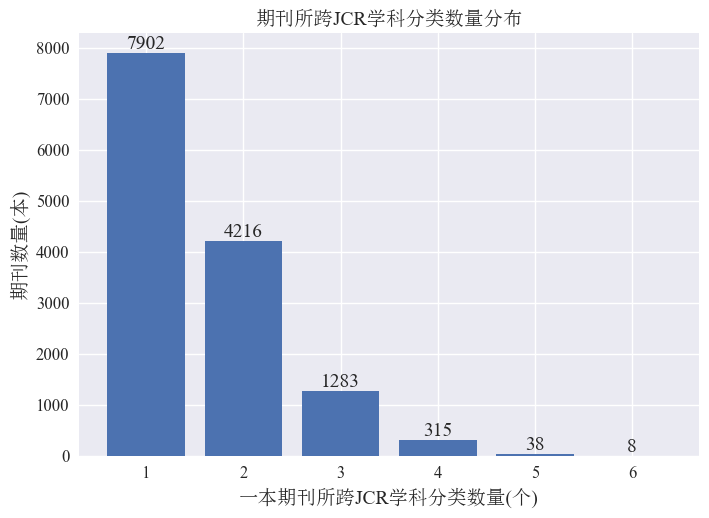

In [16]:
# 期刊数量分布
numJournalCateCounter = Counter()
for k,v in mag2journal.items():
    numJournalCateCounter[len(set(v['FieldList']))] += 1
print(numJournalCateCounter)
numFields , frequency = zip(*numJournalCateCounter.items())
print(numFields, frequency)
fig, ax = plt.subplots()
bars = ax.bar(numFields, frequency)
ax.bar_label(bars)
ax.set_ylabel('期刊数量(本)', font=prop.get_name())
ax.set_xlabel('一本期刊所跨JCR学科分类数量(个)', font=prop.get_name())
ax.set_title('期刊所跨JCR学科分类数量分布', font=prop.get_name())
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()
fig.savefig("期刊所跨JCR学科数量分布.png",dpi=300)

注意到，去除了索引后缀后，跨单JCR学科的期刊数量增加了。